In [152]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from proj1_helpers import *
from implementations import *
from impl_proj1 import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [42]:

DATA_TRAIN_PATH = 'data/train.csv' #data path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
DATA_TEST_PATH = 'data/test.csv'
y_test, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)


## Do your thing crazy machine learning thing here :) ...

In [43]:
tX_rem = dealing_with_missing_data_mean(tX)
tX_rem = np.delete(tX_rem, [0, 3, 6, 7, 17, 18], axis=1)
tX_test_rem = dealing_with_missing_data_mean(tX_test)
tX_test_rem = np.delete(tX_test_rem, [0, 3, 6, 7, 17, 18], axis=1)


[ 1.21858528e+02  4.92398193e+01  8.11819816e+01  5.78959617e+01
  2.37309984e+00  1.89173324e+01  1.58432217e+02  1.43760943e+00
 -1.28304708e-01  3.87074191e+01 -1.09730480e-02 -8.17107200e-03
  4.66602072e+01 -1.95074680e-02  4.35429640e-02  4.17172345e+01
 -1.01191920e-02  2.09797178e+02  9.79176000e-01  7.30645914e+01]
[ 1.21871729e+02  4.92583872e+01  8.11223377e+01  5.78290937e+01
  2.37421083e+00  1.89926203e+01  1.58668286e+02  1.43928858e+00
 -1.26825167e-01  3.86940752e+01 -1.19663944e-02 -1.53522257e-02
  4.67065833e+01 -1.88911706e-02  5.20638271e-02  4.16269376e+01
 -7.98097804e-03  2.09957809e+02  9.80251233e-01  7.32676287e+01]


## Gradient descent

In [77]:
gamma = 0.5
max_iters = 2000
initial_w = np.zeros(tX_rem.shape[1])
data_mean = tX_rem.mean(axis=0)
data_std = tX_rem.std(axis=0)
tX_std = standardize(tX_rem,data_mean,data_std)
acc_train, acc_test, _ = cross_validation_demo(y,tX_std,gamma,max_iters,"GD")

#w, _ = least_squares_GD(y, tX_std, initial_w, max_iters, gamma)

tX_test_std = standardize(tX_test_rem,data_mean,data_std)

#y_pred = predict_labels(w,tX_test_std)
#acc = check_accuracy(y_pred,y_test)
"""OUTPUT_PATH = 'sample-submission.csv'
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)"""


7182014
Gradient Descent(1804/1999): loss=0.40702008251291516, w0=-0.2696940804033458, w1=-0.2193513097182014
Gradient Descent(1805/1999): loss=0.40702008251291516, w0=-0.2696940804033458, w1=-0.2193513097182014
Gradient Descent(1806/1999): loss=0.40702008251291516, w0=-0.2696940804033458, w1=-0.2193513097182014
Gradient Descent(1807/1999): loss=0.40702008251291516, w0=-0.2696940804033458, w1=-0.2193513097182014
Gradient Descent(1808/1999): loss=0.40702008251291516, w0=-0.2696940804033458, w1=-0.2193513097182014
Gradient Descent(1809/1999): loss=0.40702008251291516, w0=-0.2696940804033458, w1=-0.2193513097182014
Gradient Descent(1810/1999): loss=0.40702008251291516, w0=-0.2696940804033458, w1=-0.2193513097182014
Gradient Descent(1811/1999): loss=0.40702008251291516, w0=-0.2696940804033458, w1=-0.2193513097182014
Gradient Descent(1812/1999): loss=0.40702008251291516, w0=-0.2696940804033458, w1=-0.2193513097182014
Gradient Descent(1813/1999): loss=0.40702008251291516, w0=-0.2696940804033

"OUTPUT_PATH = 'sample-submission.csv'\ncreate_csv_submission(ids_test, y_pred, OUTPUT_PATH)"

In [78]:
print(acc_train)
print(acc_test)
print(y_pred.shape)
print(y_test.shape)
print(w.shape)

[0.7075130000000001]
[0.707408]
(568238,)
(568238,)
(14,)


## Stochastic gradient descent

In [89]:
gamma = 0.01
max_iters = 2000
initial_w = np.zeros(tX_rem.shape[1])
data_mean = tX_rem.mean(axis=0)
data_std = tX_rem.std(axis=0)
tX_std = standardize(tX_rem,data_mean,data_std)

acc_train, acc_test, _ = cross_validation_demo(y,tX_std,gamma,max_iters,"SGD")

tX_test_std = standardize(tX_test_rem,data_mean,data_std)

y_pred = predict_labels(w,tX_test_std)
acc = check_accuracy(y_pred,y_test)

38856, w0=-0.4213988499176493, w1=-0.21533949701347438
Gradient Descent(1806/1999): loss=1.058146260255563, w0=-0.4334242751802658, w1=-0.26299687056202264
Gradient Descent(1807/1999): loss=5.85342933107078e-06, w0=-0.43347128509073374, w1=-0.26298727183854087
Gradient Descent(1808/1999): loss=0.028592902266510067, w0=-0.43036329713843763, w1=-0.26451819077184996
Gradient Descent(1809/1999): loss=0.30397501701953195, w0=-0.4326321424991738, w1=-0.2678876946246686
Gradient Descent(1810/1999): loss=1.1881872493983472, w0=-0.42151573627275046, w1=-0.26262367663886604
Gradient Descent(1811/1999): loss=1.2148596876844697, w0=-0.415798951884923, w1=-0.266288774208296
Gradient Descent(1812/1999): loss=0.7465953903541879, w0=-0.42242243149621195, w1=-0.2583614697673995
Gradient Descent(1813/1999): loss=0.711832083678385, w0=-0.4119699703193623, w1=-0.25401996234778035
Gradient Descent(1814/1999): loss=0.14602595544125085, w0=-0.41904013996008854, w1=-0.2547078485898548
Gradient Descent(1815/19

In [90]:
print(acc_train)
print(acc_test)

[0.689094]
[0.688836]


## Least squares

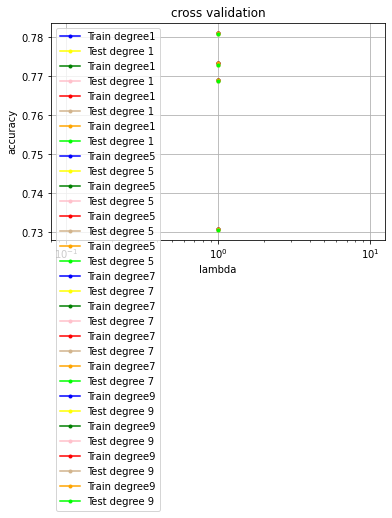

In [107]:
data_mean = tX_rem.mean(axis=0)
data_std = tX_rem.std(axis=0)
tX_std = standardize(tX_rem,data_mean,data_std)
max_iters = 0 
gamma = 0

acc_trains = []
acc_tests = []
degrees = [1,5,7,9]
for degree in degrees:
    acc_train, acc_test, _ = cross_validation_demo(y,tX_std,gamma,max_iters,"LS",degree)
    acc_trains.append(acc_train)
    acc_tests.append(acc_test)

tX_test_std = standardize(tX_test_rem,data_mean,data_std)

y_pred = predict_labels(w,tX_test_std)
acc = check_accuracy(y_pred,y_test)

In [109]:
print(acc_trains)
print(acc_tests)

[[0.730891], [0.769138], [0.7733909999999999], [0.781133]]
[[0.7305400000000001], [0.768772], [0.772972], [0.7807920000000002]]


## Ridge regression

In [211]:
data_mean = tX_rem.mean(axis=0)
data_std = tX_rem.std(axis=0)
tX_std = standardize(tX_rem,data_mean,data_std)
max_iters = 0 
gamma = 0

acc_trains = []
acc_tests = []
acc_w = []
degrees = [5,7,9]
for i,degree in enumerate(degrees):
    acc_train, acc_test, w = cross_validation_demo(y,tX_std,gamma,max_iters,"RR",degree,i)
    acc_trains.append(acc_train)
    acc_tests.append(acc_test)
    acc_w.append(w)

acc_tests = np.array(acc_tests)
num = acc_tests.shape[0]
lambdas = np.logspace(-4, -2, 8)
lambdas = np.tile(lambdas, num)

acc_tests_flat = np.array(acc_tests).ravel()
max = np.max(acc_tests_flat)
idx = np.where(acc_tests_flat == max)
lamb = lambdas[idx]
w = acc_w[idx]

print("Maximum accuracy: ", max)
print("Corresponding lambda for max accuracy: ", lamb)

tX_test_std = standardize(tX_test_rem,data_mean,data_std)
y_pred = predict_labels(w,tX_test_std)
acc = check_accuracy(y_pred,y_test)



IndexError: list index out of range

In [133]:

#plt.semilogx(np.logspace(-5, 0, 10),acc_trains[0], marker=".", color='b', label='train error')
print(len(acc_trains))
#plt.semilogx(np.logspace(-5, 0, 10),acc_tests[0], marker=".", color='r', label='test error')
print(len(acc_tests))

2
2


## Logistic regression

In [201]:
data_mean = tX_rem.mean(axis=0)
data_std = tX_rem.std(axis=0)
tX_std = standardize(tX_rem,data_mean,data_std)
max_iters = 2000
gamma = 0.01
y_tag = change_tags(y)

acc_trains = []
acc_tests = []
degrees = [1]
for i,degree in enumerate(degrees):
    acc_train, acc_test, w = cross_validation_demo(y,tX_std,gamma,max_iters,"LR",degree,i)
    acc_trains.append(acc_train)
    acc_tests.append(acc_test)

"""tX_test_std = standardize(tX_test_rem,data_mean,data_std)
y_test_tag = change_tags(y_test)
y_pred = predict_labels_logistic(w,tX_test_std)
acc = check_accuracy(y_pred,y_test_tag)"""

527087840304606
Current iteration=1800, loss=0.45197796558008607
Current iteration=1810, loss=0.4512507699798094
Current iteration=1820, loss=0.4505271682947914
Current iteration=1830, loss=0.44980713189030097
Current iteration=1840, loss=0.44909063242799413
Current iteration=1850, loss=0.4483776418622428
Current iteration=1860, loss=0.4476681324365175
Current iteration=1870, loss=0.44696207667981924
Current iteration=1880, loss=0.4462594474031624
Current iteration=1890, loss=0.4455602176961056
Current iteration=1900, loss=0.4448643609233331
Current iteration=1910, loss=0.44417185072128107
Current iteration=1920, loss=0.4434826609948137
Current iteration=1930, loss=0.44279676591394396
Current iteration=1940, loss=0.4421141399106003
Current iteration=1950, loss=0.4414347576754383
Current iteration=1960, loss=0.44075859415469737
Current iteration=1970, loss=0.440085624547099
Current iteration=1980, loss=0.439415824300791
Current iteration=1990, loss=0.43874916911033035
Current iteration=

In [202]:
print(acc_trains)
print(acc_tests)
OUTPUT_PATH = 'sample-submission999.csv'
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

[[0.702844]]
[[0.702752]]


## Penalized logistic regression

iteration=1830, loss=0.1966883510641206
Current iteration=1840, loss=0.1962272789383685
Current iteration=1850, loss=0.19576945026146586
Current iteration=1860, loss=0.19531482770738737
Current iteration=1870, loss=0.19486337459209135
Current iteration=1880, loss=0.19441505485886013
Current iteration=1890, loss=0.19396983306405305
Current iteration=1900, loss=0.19352767436325838
Current iteration=1910, loss=0.1930885444978303
Current iteration=1920, loss=0.19265240978179926
Current iteration=1930, loss=0.19221923708914282
Current iteration=1940, loss=0.19178899384140574
Current iteration=1950, loss=0.19136164799565755
Current iteration=1960, loss=0.19093716803277686
Current iteration=1970, loss=0.19051552294605245
Current iteration=1980, loss=0.19009668223009005
Current iteration=1990, loss=0.18968061587001625
Current iteration=0, loss=0.6906988715817151
Current iteration=10, loss=0.6673597742395023
Current iteration=20, loss=0.6459555180671632
Current iteration=30, loss=0.626289127648

'tX_test_std = standardize(tX_test_rem,data_mean,data_std)\ny_test_tag = change_tags(y_test)\ny_pred = predict_labels_logistic(w,tX_test_std)\nacc = check_accuracy(y_pred,y_test_tag)'

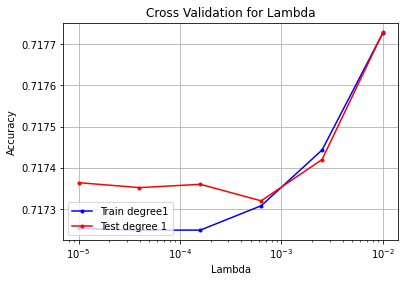

In [212]:
data_mean = tX_rem.mean(axis=0)
data_std = tX_rem.std(axis=0)
tX_std = standardize(tX_rem,data_mean,data_std)
max_iters = 2000 
gamma = 0.01
y_tag = change_tags(y)

acc_trains = []
acc_tests = []
degrees = [1]
for i,degree in enumerate(degrees):
    acc_train, acc_test, w = cross_validation_demo(y,tX_std,gamma,max_iters,"PLR",degree,i)
    acc_trains.append(acc_train)
    acc_tests.append(acc_test)

"""tX_test_std = standardize(tX_test_rem,data_mean,data_std)
y_test_tag = change_tags(y_test)
y_pred = predict_labels_logistic(w,tX_test_std)
acc = check_accuracy(y_pred,y_test_tag)"""

In [209]:
print(acc_trains)
print(acc_tests)

[[0.702843, 0.7028449999999999, 0.702846, 0.7028589999999999, 0.7028589999999999, 0.7028129999999999]]
[[0.702756, 0.702752, 0.702768, 0.7027720000000001, 0.702716, 0.702684]]


In [210]:
acc_tests = np.array(acc_tests)
num = acc_tests.shape[0]
lambdas = np.logspace(-5, -2, 6)
lambdas = np.tile(lambdas, num)

acc_tests_flat = np.array(acc_tests).ravel()
max = np.max(acc_tests_flat)
idx = np.where(acc_tests_flat == max)
lamb = lambdas[idx]

print("Maximum accuracy: ", max)
print("Corresponding lambda for max accuracy: ", lamb)

Maximum accuracy:  0.7027720000000001
Corresponding lambda for max accuracy:  [0.00063096]


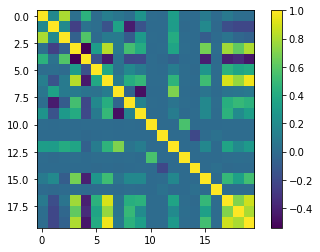

In [107]:
corr = np.corrcoef(tX_std.T)
#test
plt.imshow(corr,cmap='viridis',interpolation='nearest')
plt.colorbar()


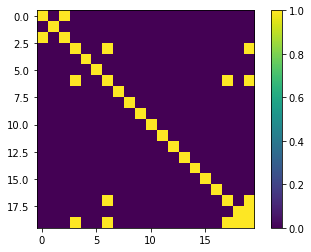

In [134]:
corr = np.corrcoef(tX_std.T)
corr_thresh = np.array(corr)
corr_thresh[(np.abs(corr_thresh) > 0.8) & (np.abs(corr_thresh) < 1)] = 1
corr_thresh[(np.abs(corr_thresh) <= 0.8)] = 0

corr_thresh

plt.imshow(corr_thresh,cmap='viridis',interpolation='nearest')
plt.colorbar()



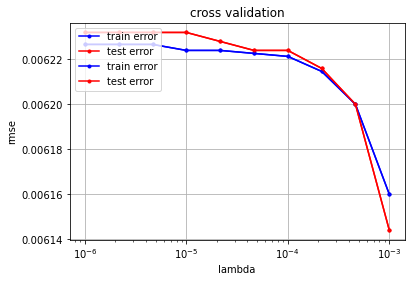

In [328]:

#print(tX)
initial_w = np.zeros(tX_std.shape[1])

#initial_w = np.ones(tX.shape[1])


"""x_train = dealing_with_missing_data_mean(x_train)
initial_w = np.zeros(x_train.shape[1])
y_train = change_tags(y_train)

x_test = dealing_with_missing_data_mean(x_test)
y_test = change_tags(y_test)"""

max_iters = 1000
#gamma = 0.000002
#gamma = 0.00007
gamma = 0.1
#tX_norm = standarize(tX)
#tX_norm = scaler.fit_transform(tX) 
lambda_ = 0.1
#weights, loss = least_squares_GD(y, tX, initial_w, max_iters, gamma) #Works. gamma = 0.00000034 is a good one. With standarization we get bigger training loss
#weights = least_squares(y,tX) #Works. test error huge why??
#weights = ridge_regression(y, tX, lambda_) #Works. A lambda study is needed.

#logistic_regression_penalized_gradient_descent_demo(y, tX_rem, initial_w, gamma, max_iters, lambda_)
degrees = [1,10]
trs = []
tes = []
ws = []
for i, degree in enumerate(degrees):
    tX_aug = build_poly(tX_std,degree)
    tr, te, w = cross_validation_demo(y,tX_std,gamma,max_iters) 
    trs.append(tr)
    tes.append(te)
    ws.append(w)

#plt.plot(losst)
#loss1, w1 = logistic_regression_penalized_gradient_descent_demo(y_train, x_train, initial_w, gamma, max_iters, lambda_)
#print("")
#loss2, w2 = logistic_regression_penalized_gradient_descent_demo(y_test, x_test, w1, gamma, max_iters, lambda_)
#logistic_regression_penalized_gradient_descent_demo(y, tX)
#loss, weights = learning_by_penalized_gradient(y, tX, initial_w, gamma, lambda_)
#print(loss)

In [125]:
plt.semilogx(np.logspace(-6, -3, 10),trs, marker=".", color='b', label='train error')
print(trs)
plt.semilogx(np.logspace(-6, -3, 10),trs[0], marker=".", color='r', label='train error')
print(tes)

#plt.semilogx(te, marker=".", color='r', label='test error')
#print(te)

NameError: name 'trs' is not defined

## Generate predictions and save ouput in csv format for submission:

In [221]:
initial_w = np.zeros(tX_std.shape[1])
gamma=0.1
deg = 9
tX_aug = build_poly(tX_std,9)
initial_w = np.zeros(tX_aug.shape[1])
#train_loss, w_train = logistic_regression_penalized_gradient_descent_demo(y, tX_aug, initial_w, gamma, 3000, 1e-4)
w_train = ridge_regression(y,tX_aug,0.001)

In [222]:
tX_test_rem = dealing_with_missing_data_mean(tX_test)
tX_test_rem = np.delete(tX_test_rem, [0, 3, 6, 7, 17, 18], axis=1)
y_test = change_tags(y_test)
tX_test_rem = standarize(tX_test_rem,mean_tr,std_tr)

[ 1.21871729e+02  4.92583872e+01  8.11223377e+01  5.78290937e+01
  2.37421083e+00  1.89926203e+01  1.58668286e+02  1.43928858e+00
 -1.26825167e-01  3.86940752e+01 -1.19663944e-02 -1.53522257e-02
  4.67065833e+01 -1.88911706e-02  5.20638271e-02  4.16269376e+01
 -7.98097804e-03  2.09957809e+02  9.80251233e-01  7.32676287e+01]


In [210]:
print(tX_test_rem.shape)


(568238, 14)


In [223]:
OUTPUT_PATH = 'sample-submission.csv' # TODO: fill in desired name of output file for submission

tX_test_rem_build = build_poly(tX_test_rem,9)
y_pred = predict_labels(w_train, tX_test_rem_build)
print(check_accuracy(y_pred, y_test))

(0.3067922243848528, 0.4695348176398422)


In [ ]:
print(check_accuracy(y_pred, y_test))

In [37]:
print(tX_aug.shape)
print(accuracy(y_pred, y_test))
print(y_pred)

(250000, 127)
0.3521446999320707
[-1. -1. -1. ...  1. -1. -1.]


In [36]:
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)